In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spotify_analysis_dataset.csv')

In [4]:
df.head()

,track_id,track_name,artist,album,release_date,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,TRK1000,Song 0,Artist 7,Album 3,2010-01-01,240151,70,0.037,0.349,-2.87,0.522,0.616,0.931,0.947,0.353,110.14
1,TRK1001,Song 1,Artist 4,Album 5,2010-01-02,253767,58,0.610,0.726,-22.87,0.770,0.635,0.858,0.986,0.584,75.90
2,TRK1002,Song 2,Artist 13,Album 19,2010-01-03,244375,85,0.503,0.897,-1.33,0.216,0.045,0.429,0.753,0.078,154.02
3,TRK1003,Song 3,Artist 11,Album 7,2010-01-04,299262,27,0.051,0.887,-1.46,0.623,0.375,0.751,0.376,0.974,132.84
4,TRK1004,Song 4,Artist 8,Album 9,2010-01-05,256330,65,0.279,0.780,-5.88,0.085,0.626,0.755,0.084,0.986,168.12


# Agrupando as informações gerais do Dataframe (SUMMARY)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          50 non-null     object 
 1   track_name        50 non-null     object 
 2   artist            50 non-null     object 
 3   album             50 non-null     object 
 4   release_date      50 non-null     object 
 5   duration_ms       50 non-null     int64  
 6   popularity        50 non-null     int64  
 7   danceability      50 non-null     float64
 8   energy            50 non-null     float64
 9   loudness          50 non-null     float64
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
dtypes: float64(9), int64(2), object(5)
memory usag

Quantidade de músicas

In [6]:
df['track_id'].count()

50

Quantidade de artistas

In [7]:
df['artist'].nunique()

14

Quantidade de Álbuns

In [8]:
df['album'].nunique()

18

Distribuição das faixas por Artista

In [9]:
df.groupby('artist')['track_id'].nunique()

artist
Artist 1     2
Artist 10    3
Artist 11    5
Artist 12    7
Artist 13    3
Artist 14    4
Artist 2     2
Artist 3     3
Artist 4     3
Artist 5     4
Artist 6     3
Artist 7     4
Artist 8     5
Artist 9     2
Name: track_id, dtype: int64

Distribuição das faixas por Álbuns

In [10]:
df.groupby('album')['track_id'].nunique()

album
Album 1     1
Album 10    2
Album 12    2
Album 13    3
Album 14    4
Album 15    5
Album 16    2
Album 17    1
Album 18    5
Album 19    1
Album 2     3
Album 3     2
Album 4     5
Album 5     1
Album 6     1
Album 7     4
Album 8     4
Album 9     4
Name: track_id, dtype: int64

Faixa mais popular

In [11]:
df.nlargest(1, 'popularity')[['track_name', 'popularity']]


,track_name,popularity
20,Song 20,96


Faixa menos popular

In [12]:
df.nsmallest(1, 'popularity')[['track_name', 'popularity']]


,track_name,popularity
21,Song 21,0


Média da Popularidade

In [13]:
round(df['popularity'].mean(), 1)

50.3

Duração média das faixas

In [14]:
duracao_media = df['duration_ms'].mean()
duracao_media = (lambda x: f"{int(x)//60000}:{(int(x)%60000)//1000:02d}")(duracao_media)

In [15]:
print(f'A duração média é de {duracao_media}')

A duração média é de 3:32


(array([4., 5., 3., 2., 3., 0., 2., 3., 5., 7., 6., 5., 1., 3., 1.]),
 array([128392.        , 139783.33333333, 151174.66666667, 162566.        ,
        173957.33333333, 185348.66666667, 196740.        , 208131.33333333,
        219522.66666667, 230914.        , 242305.33333333, 253696.66666667,
        265088.        , 276479.33333333, 287870.66666667, 299262.        ]),
 <BarContainer object of 15 artists>)

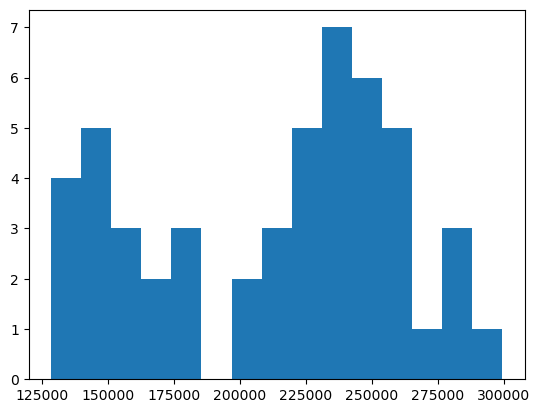

In [21]:
plt.hist(df['duration_ms'], bins=15)

Duração máxima das faixas

In [18]:
duracao_maxima = df['duration_ms'].max()
duracao_maxima = (lambda x: f"{int(x)//60000}:{(int(x)%60000)//1000:02d}")(duracao_maxima)

In [19]:
print(f'A duração máxima é de {duracao_maxima}')

A duração máxima é de 4:59


Duração mínima das faixas

In [20]:
duracao_minima = df['duration_ms'].min()
duracao_minima = (lambda x: f"{int(x)//60000}:{(int(x)%60000)//1000:02d}")(duracao_minima)

In [21]:
print(f'A duração máxima é de {duracao_minima}')

A duração máxima é de 2:08


### Criando a coluna **'duration_min:seg'** a partir coluna **'duration_ms'** para uma melhor interpretação dos dados(Formatando os dados para um formato mais legível).

In [22]:
df['duration_min:seg'] = df['duration_ms'].apply(lambda x: f"{x//60000}:{(x%60000)//1000:02d}")

Exibindo as últimas linhas do novo DataFrame criado.

In [23]:
df[['duration_min:seg']].tail()

,duration_min:seg
45,3:27
46,4:29
47,3:45
48,4:44
49,3:02


Qual é a faixa média de danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness e valence?

Média(danceability)

In [24]:
print(f"A média de dacenbility é de {round(df['danceability'].mean(), 1)}")

A média de dacenbility é de 0.5


Média(energy)

In [25]:
print(f"A média de energy é de {round(df['energy'].mean(), 1)}")

A média de energy é de 0.5


Média(loudness)

In [26]:
print(f"A média de loudness é de {round(df['loudness'].mean(), 1)}")

A média de loudness é de -17.7


Média(speechiness)

In [27]:
print(f"A média de speechiness é de {round(df['speechiness'].mean(), 1)}")

A média de speechiness é de 0.5


Média(acousticness)

In [28]:
print(f"A média de acousticness é de {round(df['acousticness'].mean(), 1)}")

A média de acousticness é de 0.5


Média(instrumentalness)

In [29]:
print(f"A média de instrumentalness é de {round(df['instrumentalness'].mean(), 1)}")

A média de instrumentalness é de 0.5


Média(liveness)

In [30]:
print(f"A média de liveness é de {round(df['liveness'].mean(), 1)}")

A média de liveness é de 0.5


Média(valence)

In [31]:
print(f"A média de valence é de {round(df['valence'].mean(), 1)}")

A média de valence é de 0.6


Qual é o tempo médio (BPM) das faixas?

In [32]:
print(f"A média de BMPs das faixa é de {round(df['tempo'].mean(), 1)}")

A média de BMPs das faixa é de 126.1


Música mais antiga.

In [33]:
df.loc[df['release_date'].idxmin(), ['track_name', 'release_date']]


track_name          Song 0
release_date    2010-01-01
Name: 0, dtype: object

Música mais recente.

In [34]:
df.loc[df['release_date'].idxmax(), ['track_name', 'release_date']]

track_name         Song 49
release_date    2010-02-19
Name: 49, dtype: object

Existe algum valor faltando ou outlier em alguma coluna numérica?

In [1]:


# Supondo que o dataset já está carregado no df
numeric_cols = ['duration_ms', 'popularity', 'danceability', 'energy',
                'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo']

# Função para detectar outliers usando IQR
def detectar_outliers(df, colunas):
    outlier_dict = {}
    for col in colunas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
        if not outliers.empty:
            outlier_dict[col] = outliers[['track_name', 'artist', col]]
    
    return outlier_dict

# Detectar outliers
outliers_encontrados = detectar_outliers(df, numeric_cols)

# Mostrar os resultados
for coluna, outlier_df in outliers_encontrados.items():
    print(f"\nOutliers na coluna '{coluna}':")
    print(outlier_df)



NameError: name 'df' is not defined

# Coletando os INSIGHTS

🔹 Interpretando correlação

- 0 a 0.3 → fraca influência

- 0.4 a 0.6 → média influência

- 0.7 a 1.0 → forte influência

Há relação entre popularidade e atributos como danceability, energy, tempo ou valence?

In [36]:
cols = ['popularity', 'danceability', 'energy', 'valence', 'tempo']
print(round(df[cols].corr(), 1))


              popularity  danceability  energy  valence  tempo
popularity           1.0          -0.2    -0.1     -0.1    0.1
danceability        -0.2           1.0     0.2     -0.1   -0.3
energy              -0.1           0.2     1.0      0.0   -0.2
valence             -0.1          -0.1     0.0      1.0    0.1
tempo                0.1          -0.3    -0.2      0.1    1.0


#### Faixas mais antigas tendem a ter menor popularidade ou energia?

A análise de correlação entre o ano de lançamento e a popularidade/energia não foi possível, uma vez que todas as faixas do dataset pertencem ao mesmo ano de lançamento, não havendo variação temporal suficiente para avaliar essa relação.

Artistas com mais faixas têm maior popularidade média?


In [37]:
num_faixas = df.groupby('artist')['track_id'].nunique()
media_pop = df.groupby('artist')['popularity'].mean()

print(f"A quantidade de músicas não é um fator determinante no que concerne a popularidade do artista, resultando em uma correlação de {round(num_faixas.corr(media_pop), 1)}")

A quantidade de músicas não é um fator determinante no que concerne a popularidade do artista, resultando em uma correlação de 0.4


Existe padrão entre loudness e instrumentalness ou acousticness?

In [38]:
round(df[['loudness', 'acousticness', 'instrumentalness']].corr(), 1)


,loudness,acousticness,instrumentalness
loudness,1.0,-0.2,-0.0
acousticness,-0.2,1.0,-0.0
instrumentalness,-0.0,-0.0,1.0


In [39]:
dance_lim = df['danceability'].quantile(0.5)
energy_lim = df['energy'].quantile(0.5)
valence_lim = df['valence'].quantile(0.5)

animadas = df[
    (df['danceability'] > dance_lim) &
    (df['energy'] > energy_lim) &
    (df['valence'] > valence_lim)
]
print(round(animadas[['track_name','artist','danceability','energy','valence']], 1))

   track_name     artist  danceability  energy  valence
5      Song 5  Artist 13           0.9     0.6      0.7
9      Song 9   Artist 3           1.0     0.6      0.7
12    Song 12  Artist 11           0.8     0.7      0.8
17    Song 17   Artist 8           0.6     0.7      0.9
37    Song 37  Artist 11           0.9     0.6      1.0
40    Song 40  Artist 12           0.7     0.7      0.9


Existe diferença entre músicas mais “vivas” (liveness) e músicas mais acústicas?

In [40]:
round(df[['liveness', 'acousticness']].corr(), 1)


,liveness,acousticness
liveness,1.0,0.2
acousticness,0.2,1.0


Embora ambos os atributos descrevam características qualitativas da música, liveness e acousticness medem conceitos diferentes: liveness captura a probabilidade de uma faixa ser gravada ao vivo, enquanto acousticness mede o grau de instrumentação acústica. A correlação entre eles é baixa, indicando que músicas acústicas nem sempre são ao vivo e músicas ao vivo nem sempre são acústicas.

Qual é o artista que mais trabalhou musicalmente?

In [41]:
artista_mais_lançou_musicas = df['artist'].value_counts().index[0]
artista_mais_lançou_musicas




'Artist 12'

In [42]:
df['artist'].value_counts().iloc[0]

7

In [43]:
df.loc[df['artist'] == artista_mais_lançou_musicas]

,track_id,track_name,artist,album,release_date,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min:seg
23,TRK1023,Song 23,Artist 12,Album 4,2010-01-24,155222,61,0.041,0.650,-25.62,0.156,0.196,0.673,0.224,0.987,186.58,2:35
27,TRK1027,Song 27,Artist 12,Album 4,2010-01-28,144538,71,0.512,0.094,-5.32,0.660,0.094,0.091,0.043,0.970,115.52,2:24
30,TRK1030,Song 30,Artist 12,Album 2,2010-01-31,259182,61,0.174,0.244,-19.94,0.738,0.319,0.550,0.993,0.469,192.93,4:19
34,TRK1034,Song 34,Artist 12,Album 16,2010-02-04,230989,43,0.138,0.631,-8.17,0.248,0.282,0.117,0.523,0.865,96.15,3:50
40,TRK1040,Song 40,Artist 12,Album 13,2010-02-10,143419,87,0.660,0.722,-38.56,0.041,0.803,0.701,0.901,0.945,93.62,2:23
41,TRK1041,Song 41,Artist 12,Album 18,2010-02-11,170015,51,0.817,0.281,-21.38,0.855,0.282,0.073,0.045,0.850,70.62,2:50
46,TRK1046,Song 46,Artist 12,Album 13,2010-02-16,269213,38,0.897,0.954,-38.51,0.473,0.413,0.987,0.620,0.606,149.72,4:29


Qual é a música com maior duração de tempo?

In [44]:
df.loc[df['duration_ms'].idxmax(), ['track_name', 'duration_min:seg']]

track_name          Song 3
duration_min:seg      4:59
Name: 3, dtype: object

Qual é a música com menor duração de tempo?

In [45]:
df.loc[df['duration_ms'].idxmin(), ['track_name', 'duration_min:seg']]

track_name          Song 17
duration_min:seg       2:08
Name: 17, dtype: object

Quais são as músicas mais difíceis de Dançar?

In [46]:
df.nsmallest(3,'danceability')[['track_name', 'danceability']]

,track_name,danceability
26,Song 26,0.017
0,Song 0,0.037
23,Song 23,0.041
